In [2]:
import json
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import glob
%matplotlib inline
plt.rcParams["figure.dpi"] = 150
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# LULESH SPREADING ANALYSIS

In [3]:

def lines_that_start_with(string, fp):
    return [line for line in fp if line.startswith(string)]

data = []

for spread in [8,16,20,24,28,32]:
    
    for f in glob.glob(os.path.join(BASE_PATH, f'data/baseline_precision/lulesh_mc_64/lulesh_{spread}/lulesh_*.out')):

        with open(f, 'r') as fp:
            for line in lines_that_start_with("Elapsed time", fp):
                size = int(f.split('_')[-2])
                data.append([spread, size, float(line.split()[-2])])
                
lulesh_time = pd.DataFrame(data=data, columns=['spread', 'size', 'time'])
normal_lulesh = lulesh_time.loc[lulesh_time['spread'] == 32]


Text(0, 0.5, 'Time [s]')

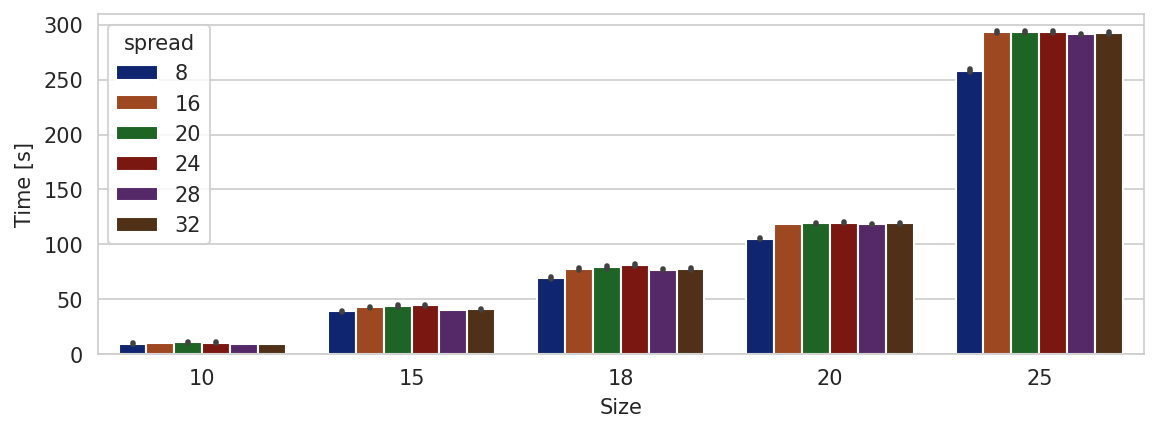

In [40]:
fig = plt.figure(figsize=(9,3))
ax = fig.gca()
g = sns.barplot(
    data=lulesh_time,
    x="size", y="time", hue="spread",
    ci="sd", palette="dark",#, alpha=.6, height=6,
    ax=ax
)
#g.despine(left=True)
ax.set_xlabel("Size")
ax.set_ylabel("Time [s]")
#g.legend.set_title("")


In [41]:
#for size in [10,15,18,20,25,30]:
#    mean_full = lulesh_time.loc[(df['size'] == size) & (df['spread'] == 32)].mean()
#    mean_empty = lulesh_time.loc[(df['size'] == size) & (df['spread'] == 24)].mean()
#    ratio = mean_full / mean_empty
#    print(size, ratio['time'])

# NAS Benchmarks

In [4]:

def lines_that_contain(string, fp):
    return [line for line in fp if string in line]

data = []

for p in [1,2,4,8]:
    
    for f in glob.glob(os.path.join(BASE_PATH, f'data/baseline_precision/nas_{p}/*.out')):
        #print(f)
        with open(f, 'r') as fp:
            for line in lines_that_contain("in seconds", fp):
                size = f.split('_')[-2]
                benchmark = f.split('_')[-3]
                data.append([p, benchmark, size, float(line.split()[-1])])

df_baremetal = pd.DataFrame(data=data, columns=['p', 'benchmark', 'size', 'time'])
mean_baremetal = df_baremetal.groupby(['benchmark', 'size', 'p']).mean()['time']
print('CoV', df_baremetal.groupby(['benchmark', 'size', 'p']).std()['time'] / mean_baremetal)

print(df_baremetal.loc[(df_baremetal['size'] == 'W') & (df_baremetal['benchmark'] == 'bt') & (df_baremetal['p'] == 1)]['time'])

CoV benchmark  size  p
bt         A     1    0.004166
                 4    0.012405
           W     1    0.012396
                 4    0.030935
cg         B     4    0.008764
                 8    0.056550
ep         B     1    0.220236
                 2    0.166182
                 4    0.214577
                 8    0.016934
           W     1    0.011171
                 2    0.167013
                 4    0.224270
                 8    0.149927
ft         B     1    0.003721
                 2    0.003189
                 4    0.031882
                 8    0.061067
           W     1    0.010751
                 2    0.013531
                 4    0.215013
                 8    0.021277
lu         A     1    0.005519
                 2    0.002413
                 4    0.007680
                 8    0.013717
mg         A     1    0.010759
           B     1    0.008488
           W     1    0.018783
Name: time, dtype: float64
1     1.799626
12    1.846604
14    1.853185
16    

In [5]:

def lines_that_contain(string, fp):
    return [line for line in fp if string in line]

data = []

for p in [1,2,4,8]:
    
    for f in glob.glob(os.path.join(BASE_PATH, f'data/baseline_precision/nas_sarus_{p}/*.out')):
        #print(f)
        with open(f, 'r') as fp:
            for line in lines_that_contain("in seconds", fp):
                size = f.split('_')[-2]
                benchmark = f.split('_')[-3]
                data.append([p, benchmark, size, float(line.split()[-1])])
                
nas_container = pd.DataFrame(data=data, columns=['p', 'benchmark', 'size', 'time'])
nas_container['type'] = nas_container.apply(lambda row: f"({row['benchmark'].upper()}, {row['size']})", axis=1)
nas_container.sort_values(by=['type'], inplace=True)
mean_container = nas_container.groupby(['benchmark', 'size', 'p']).mean()['time']
dev_container = nas_container.groupby(['benchmark', 'size', 'p']).std()['time']

print('Mean', mean_container)
print('CoV', nas_container.groupby(['benchmark', 'size', 'p']).std()['time'] / mean_container)
print('Container/baremetal', mean_container/mean_baremetal)

Mean benchmark  size  p
bt         A     1    56.539328
                 4    12.345589
           W     1     1.966759
                 4     0.538539
cg         B     4    24.431103
                 8     7.175980
ep         B     1    18.806307
                 2     9.439797
                 4     4.787748
                 8     2.685487
           W     1     0.603261
                 2     0.312517
                 4     0.166947
                 8     0.096532
ft         B     1    38.482915
                 2    23.971879
                 4    13.093725
                 8     7.567092
           W     1     0.145694
                 2     0.089605
                 4     0.046968
                 8     0.026882
lu         A     1    25.879451
                 2    13.357917
                 4     6.866412
                 8     4.077910
mg         A     1     1.015738
           B     1     4.727138
           W     1     0.126450
Name: time, dtype: float64
CoV benchmark  size  

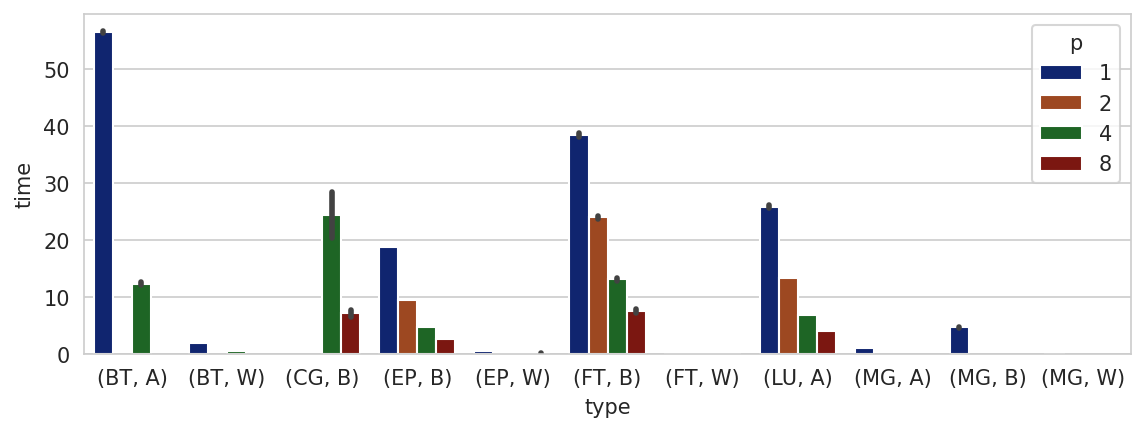

In [44]:
fig = plt.figure(figsize=(9,3))
ax = fig.gca()
g = sns.barplot(
    data=nas_container,
    x="type", y="time", hue="p",
    ci="sd", palette="dark",#, alpha=.6, height=6,
    ax=ax
)
#g.despine(left=True)
#g.set_axis_labels("Size", "Time [s]")
#g.legend.set_title("")


In [6]:
mean_nas = nas_container.groupby(['benchmark', 'size', 'p']).mean().reset_index()
dev_nas = nas_container.groupby(['benchmark', 'size', 'p']).std().reset_index()
median_nas = nas_container.groupby(['benchmark', 'size', 'p']).median().reset_index()

# Co-location Data

In [7]:

def lines_that_start_with(string, fp):
    return [line for line in fp if line.startswith(string)]

data = []

p_map = {
    'bt' : {
        'A': 4,
        'W': 1
    },
    'cg': {
        'B': 8
    },
    'ep': {
        'B': 2
    },
    'lu': {
        'A': 4
    },
    'mg': {
        'A': 1,
        'W': 1
    }
}

for dir in glob.glob(os.path.join(BASE_PATH, f'data/colocation_cpu_precision/*')):
    
    name = os.path.basename(dir)
    
    app = name.split('_')[2]
    l_size = int(name.split('_')[1])
    bench_size = name.split('_')[3]
    
    for f in glob.glob(os.path.join(BASE_PATH, f'{dir}/nas_*.out')):
        print(f)
        with open(f, 'r') as fp:
            for line in lines_that_contain("in seconds", fp):
                data.append([l_size, bench_size, app, p_map[app][bench_size], float(line.split()[-1])])
                
colocated_nas = pd.DataFrame(data=data, columns=['lulesh_size', 'size', 'benchmark', 'p', 'time'])
print(colocated_nas)
#print(lulesh_time.loc[lulesh_time['size'] == 10]['time'])


/work/serverless/2022/hpc_opportunities/serverless-software-disaggregation-artifact/data/colocation_cpu_precision/nas_20_bt_A/nas_20_8.1.out
/work/serverless/2022/hpc_opportunities/serverless-software-disaggregation-artifact/data/colocation_cpu_precision/nas_20_bt_A/nas_20_8.4.out
/work/serverless/2022/hpc_opportunities/serverless-software-disaggregation-artifact/data/colocation_cpu_precision/nas_20_bt_A/nas_20_9.4.out
/work/serverless/2022/hpc_opportunities/serverless-software-disaggregation-artifact/data/colocation_cpu_precision/nas_20_bt_A/nas_20_6.1.out
/work/serverless/2022/hpc_opportunities/serverless-software-disaggregation-artifact/data/colocation_cpu_precision/nas_20_bt_A/nas_20_7.0.out
/work/serverless/2022/hpc_opportunities/serverless-software-disaggregation-artifact/data/colocation_cpu_precision/nas_20_bt_A/nas_20_9.5.out
/work/serverless/2022/hpc_opportunities/serverless-software-disaggregation-artifact/data/colocation_cpu_precision/nas_20_bt_A/nas_20_5.5.out
/work/serverl

In [8]:
#print(colocated_nas)

mean_colocated_nas = colocated_nas.groupby(['benchmark', 'size', 'p', 'lulesh_size']).mean().reset_index()
dev_colocated_nas = colocated_nas.groupby(['benchmark', 'size', 'p', 'lulesh_size']).std().reset_index()
median_colocated_nas = colocated_nas.groupby(['benchmark', 'size', 'p', 'lulesh_size']).median().reset_index()
print(mean_colocated_nas)
#print(mean_container)

#print(mean_colocated / mean_container)

   benchmark size  p  lulesh_size       time
0         bt    A  4           15  14.920949
1         bt    A  4           18  15.917565
2         bt    A  4           20  16.115318
3         bt    A  4           25  16.885387
4         bt    W  1           15   2.340339
5         bt    W  1           18   2.410092
6         bt    W  1           20   2.418450
7         bt    W  1           25   2.463005
8         cg    B  8           15   5.971812
9         cg    B  8           18   6.094742
10        cg    B  8           20   6.145891
11        cg    B  8           25   6.280506
12        ep    B  2           15  10.995591
13        ep    B  2           18  11.548703
14        ep    B  2           20  11.598590
15        ep    B  2           25  11.744153
16        lu    A  4           15   8.205687
17        lu    A  4           18   8.593317
18        lu    A  4           20   8.474750
19        lu    A  4           25   8.700970
20        mg    A  1           15   1.171782
21        

In [9]:

def lines_that_start_with(string, fp):
    return [line for line in fp if line.startswith(string)]

data = []



p_map = {
    'bt' : {
        'A': 4,
        'W': 1
    },
    'cg': {
        'B': 8
    },
    'ep': {
        'B': 2
    },
    'lu': {
        'A': 4
    },
    'mg': {
        'A': 1,
        'W': 1
    }
}

for dir in glob.glob(os.path.join(BASE_PATH, f'data/colocation_cpu_precision/*')):
    
    name = os.path.basename(dir)
    
    app = name.split('_')[2]
    l_size = int(name.split('_')[1])
    bench_size = name.split('_')[3]
    
    for f in glob.glob(os.path.join(BASE_PATH, f'{dir}/lulesh_*.out')):
            
        with open(f, 'r') as fp:
            for line in lines_that_start_with("Elapsed time", fp):
                size = int(f.split('_')[-2])
                data.append([l_size, bench_size, app, float(line.split()[-2])])
                
colocated_lulesh = pd.DataFrame(data=data, columns=['size', 'benchmark_size', 'benchmark', 'time'])
#print(colocated_nas)
#print(lulesh_time.loc[lulesh_time['size'] == 10]['time'])


In [10]:
avg_lulesh = normal_lulesh.groupby(['size']).mean().reset_index()
median_lulesh = normal_lulesh.groupby(['size']).median().reset_index()
dev_lulesh = normal_lulesh.groupby(['size']).std().reset_index()
print(avg_lulesh)
print(median_lulesh)
print(dev_lulesh)

   size  spread        time
0    10    32.0    9.155678
1    15    32.0   40.621018
2    18    32.0   77.685812
3    20    32.0  119.035594
4    25    32.0  292.276421
   size  spread        time
0    10    32.0    9.100038
1    15    32.0   40.440631
2    18    32.0   77.152062
3    20    32.0  119.118239
4    25    32.0  292.189336
   size  spread      time
0    10     0.0  0.329754
1    15     0.0  0.490137
2    18     0.0  0.912380
3    20     0.0  0.464620
4    25     0.0  0.942006


In [11]:
avg_colocated_lulesh = colocated_lulesh.groupby(['size', 'benchmark', 'benchmark_size']).mean().reset_index()
median_colocated_lulesh = colocated_lulesh.groupby(['size', 'benchmark', 'benchmark_size']).median().reset_index()
dev_colocated_lulesh = colocated_lulesh.groupby(['size', 'benchmark', 'benchmark_size']).std().reset_index()
print(avg_colocated_lulesh)
print(median_colocated_lulesh)

    size benchmark benchmark_size        time
0     15        bt              A   40.696220
1     15        bt              W   40.504664
2     15        cg              B   41.492239
3     15        ep              B   40.180077
4     15        lu              A   40.541153
5     15        mg              A   43.002068
6     15        mg              W   40.720778
7     18        bt              A   77.959563
8     18        bt              W   78.059868
9     18        cg              B   78.779812
10    18        ep              B   78.234147
11    18        lu              A   78.112657
12    18        mg              W   78.495156
13    20        bt              A  119.864287
14    20        bt              W  120.322426
15    20        cg              B  122.169309
16    20        ep              B  119.450313
17    20        lu              A  119.938167
18    20        mg              W  120.441414
19    25        bt              A  295.908720
20    25        bt              W 

In [12]:

print(dev_lulesh)
print(dev_colocated_lulesh)

df1 = avg_colocated_lulesh.set_index('size')
print(df1)
df2 = avg_lulesh.set_index('size')
df3 = dev_lulesh.set_index('size')
df4 = dev_colocated_lulesh.set_index('size')
df1['dev'] = df4['time'].reindex(df1.index)
df1['original_time'] = df2['time'].reindex(df1.index)
df1['original_dev'] = df3['time'].reindex(df1.index)
df1['slowdown'] = df1['time'] / df1['original_time']

df1['slowdown_dev'] = np.sqrt((df1['original_dev'] / df1['original_time'])**2 + (df1['dev'] / df1['time'])**2)

print(df1)
print(df2)

#print(df2)
#df1['slowdown'] = df1['time'] / df2['time']
# iterate over each group
#for group_name, df_group in avg_colocated_lulesh.groupby(['benchmark', 'benchmark_size']):

#    print(df_group)
#    df_group['slowdown'] = df_group['time'] / avg_lulesh['time']
    #for row_index, row in df_group.iterrows():
        #print(row)
#print(avg_colocated_lulesh)

   size  spread      time
0    10     0.0  0.329754
1    15     0.0  0.490137
2    18     0.0  0.912380
3    20     0.0  0.464620
4    25     0.0  0.942006
    size benchmark benchmark_size      time
0     15        bt              A  0.525279
1     15        bt              W  0.392733
2     15        cg              B  1.830090
3     15        ep              B  0.201297
4     15        lu              A  0.220286
5     15        mg              A  3.451586
6     15        mg              W  0.241332
7     18        bt              A  0.393864
8     18        bt              W  0.454771
9     18        cg              B  0.540605
10    18        ep              B  0.743515
11    18        lu              A  0.420457
12    18        mg              W  0.713531
13    20        bt              A  0.735505
14    20        bt              W  0.720762
15    20        cg              B  4.003606
16    20        ep              B  0.303858
17    20        lu              A  0.413162
18    20

In [13]:
df3 = mean_colocated_nas.set_index(['benchmark', 'size', 'p'])
print(df3)
df4 = mean_nas.set_index(['benchmark', 'size', 'p'])
df10 = dev_nas.set_index(['benchmark', 'size', 'p'])
df11 = dev_colocated_nas.set_index(['benchmark', 'size', 'p'])
#print(df4)
df3['original_dev'] = df10['time'].reindex(df3.index)
df3['original_time'] = df4['time'].reindex(df3.index)
df3['slowdown'] = df3['time'] / df3['original_time']
df3['dev'] = df11['time'].reindex(df3.index)
df3['slowdown_dev'] = np.sqrt((df3['original_dev'] / df3['original_time'])**2 + (df3['dev'] / df3['time'])**2)
print(df3)

                  lulesh_size       time
benchmark size p                        
bt        A    4           15  14.920949
               4           18  15.917565
               4           20  16.115318
               4           25  16.885387
          W    1           15   2.340339
               1           18   2.410092
               1           20   2.418450
               1           25   2.463005
cg        B    8           15   5.971812
               8           18   6.094742
               8           20   6.145891
               8           25   6.280506
ep        B    2           15  10.995591
               2           18  11.548703
               2           20  11.598590
               2           25  11.744153
lu        A    4           15   8.205687
               4           18   8.593317
               4           20   8.474750
               4           25   8.700970
mg        A    1           15   1.171782
               1           18   1.147231
               1

In [14]:
df5 = df1.reset_index().rename(columns={"size": "lulesh_size"})
df6 = df3.reset_index().rename(columns={"size": "benchmark_size"})

df5 = df5.set_index(['benchmark', 'benchmark_size', 'lulesh_size'])
df6 = df6.set_index(['benchmark', 'benchmark_size', 'lulesh_size'])
print(df5)
print('-')
print(df6)

df5['nas_slowdown'] = df6['slowdown'].reindex(df5.index)
df5['nas_slowdown_dev'] = df6['slowdown_dev'].reindex(df5.index)
print(df5)
df5.reset_index(inplace=True)

p_map = {
    'bt' : {
        'A': 4,
        'W': 1
    },
    'cg': {
        'B': 8
    },
    'ep': {
        'B': 2
    },
    'lu': {
        'A': 4
    },
    'mg': {
        'A': 1,
        'W': 1
    }
}
df5['p'] = df5[['benchmark', 'benchmark_size']].apply(lambda x: p_map[x['benchmark']][x['benchmark_size']], axis=1)
#df5['p'] = p_map[df5['benchmark']][df5['bench_size']]
df5['type'] = df5.apply(lambda row: f"({row['benchmark'].upper()}, {row['benchmark_size']}, {row['p']})", axis=1)
df5.sort_values(by=['type'], inplace=True)
print(df5)

                                            time       dev  original_time  \
benchmark benchmark_size lulesh_size                                        
bt        A              15            40.696220  0.525279      40.621018   
          W              15            40.504664  0.392733      40.621018   
cg        B              15            41.492239  1.830090      40.621018   
ep        B              15            40.180077  0.201297      40.621018   
lu        A              15            40.541153  0.220286      40.621018   
mg        A              15            43.002068  3.451586      40.621018   
          W              15            40.720778  0.241332      40.621018   
bt        A              18            77.959563  0.393864      77.685812   
          W              18            78.059868  0.454771      77.685812   
cg        B              18            78.779812  0.540605      77.685812   
ep        B              18            78.234147  0.743515      77.685812   

In [15]:
print(df5)
df5['rescaled_slowdown'] = (df5['slowdown']-1)*100
df5['rescaled_nas_slowdown'] = (df5['nas_slowdown']-1)*100
df5['rescaled_slowdown_dev'] = df5['slowdown_dev']*100
df5['rescaled_nas_slowdown_dev'] = df5['nas_slowdown_dev']*100
print(df5)

   benchmark benchmark_size  lulesh_size        time       dev  original_time  \
0         bt              A           15   40.696220  0.525279      40.621018   
13        bt              A           20  119.864287  0.735505     119.035594   
19        bt              A           25  295.908720  1.712263     292.276421   
7         bt              A           18   77.959563  0.393864      77.685812   
14        bt              W           20  120.322426  0.720762     119.035594   
8         bt              W           18   78.059868  0.454771      77.685812   
20        bt              W           25  295.647019  1.425129     292.276421   
1         bt              W           15   40.504664  0.392733      40.621018   
9         cg              B           18   78.779812  0.540605      77.685812   
2         cg              B           15   41.492239  1.830090      40.621018   
15        cg              B           20  122.169309  4.003606     119.035594   
21        cg              B 

In [16]:
df5_modified = df5.drop(df5.loc[df5['type'] == '(MG, A, 1)'].index)

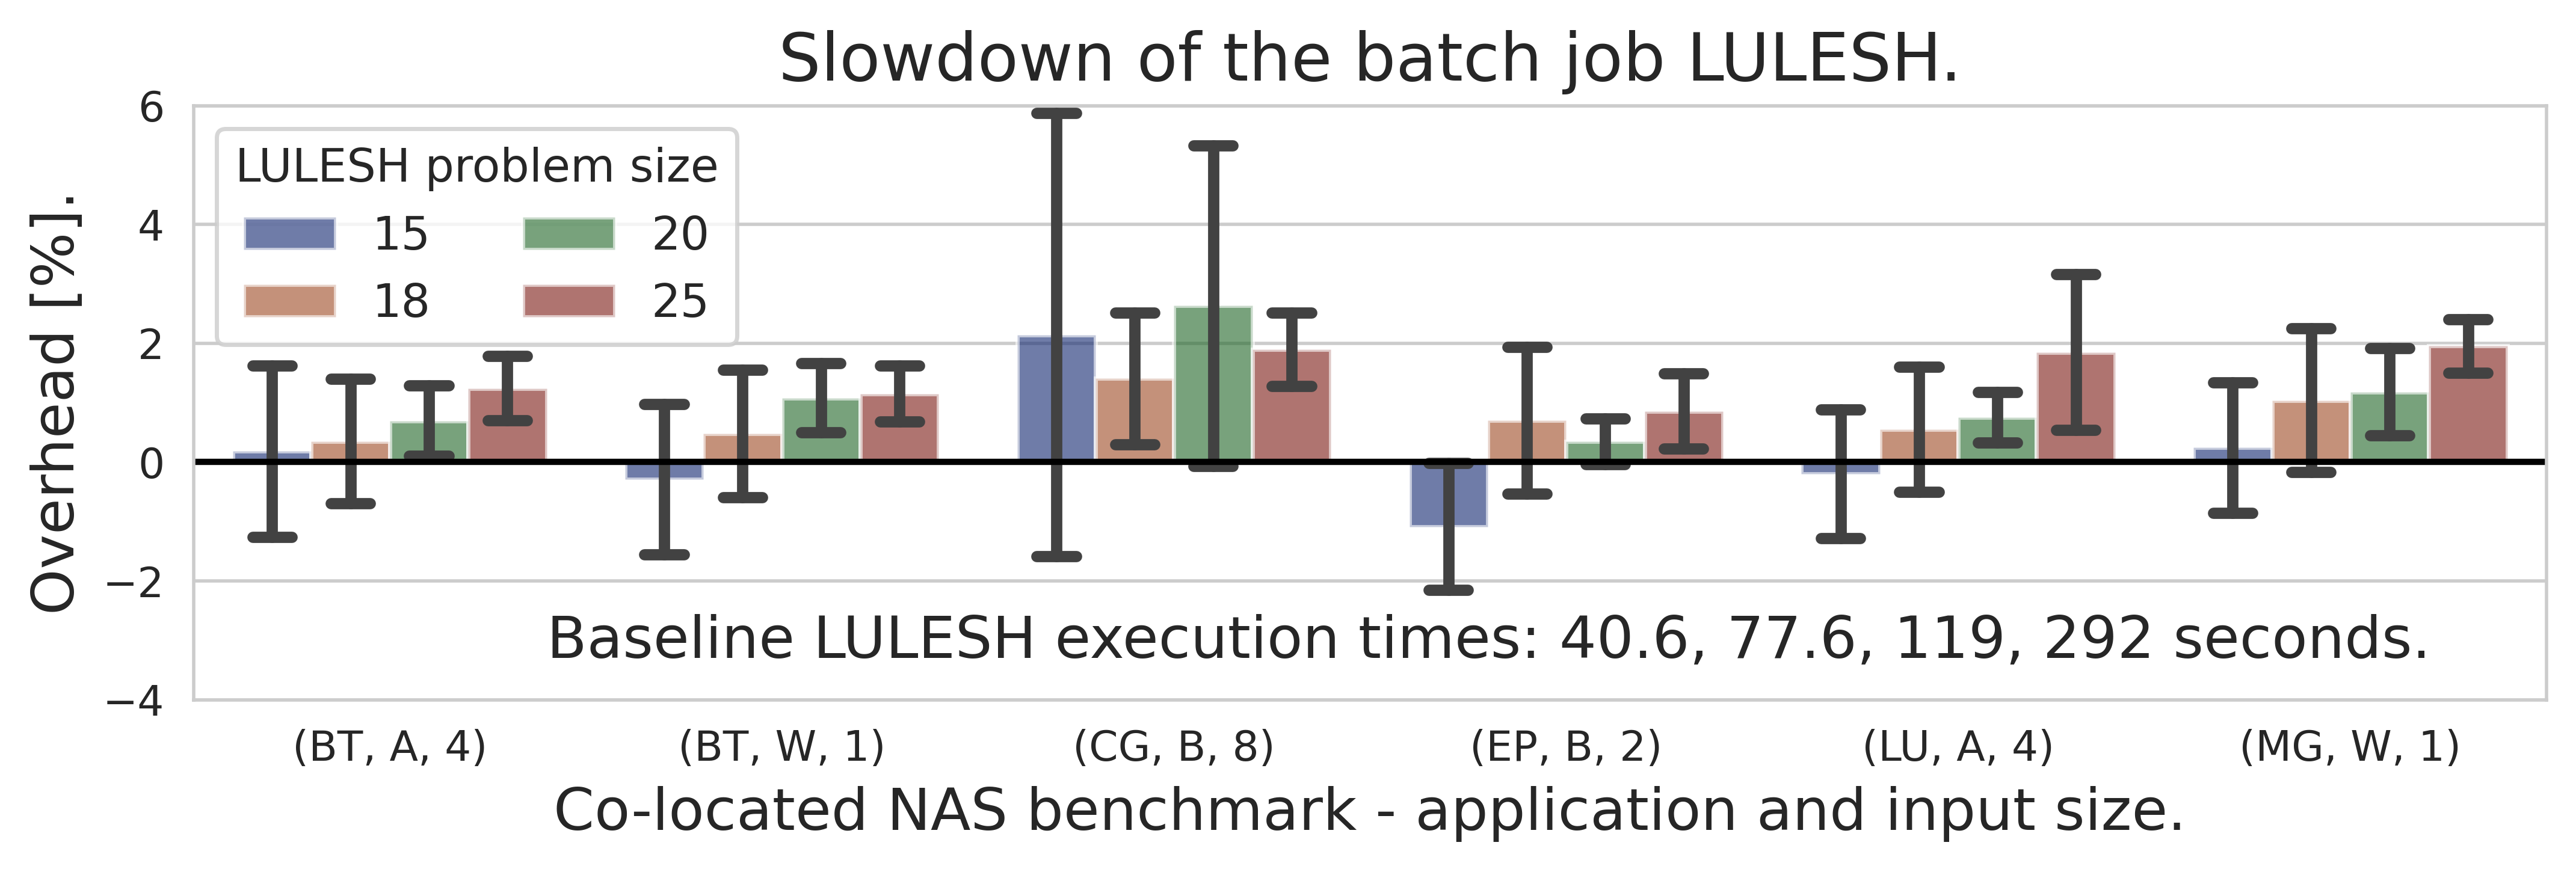

In [54]:

def barplot_err(x, y, xerr=None, yerr=None, data=None, **kwargs):

    _data = []
    for _i in data.index:

        _data_i = pd.concat([data.loc[_i:_i]]*3, ignore_index=True, sort=False)
        _row = data.loc[_i]
        if xerr is not None:
            _data_i[x] = [_row[x]-_row[xerr], _row[x], _row[x]+_row[xerr]]
        if yerr is not None:
            _data_i[y] = [_row[y]-_row[yerr], _row[y], _row[y]+_row[yerr]]
        _data.append(_data_i)

    _data = pd.concat(_data, ignore_index=True, sort=False)

    _ax = sns.barplot(x=x,y=y,data=_data,ci='sd',**kwargs)

    return _ax


sns.set_style("whitegrid")
fig = plt.figure(figsize=(9,3))
ax = fig.gca()
#g = sns.barplot(
#    data=df5_modified,
#    x="type", y="slowdown", hue="lulesh_size",
#    ci="sd", palette="dark", alpha=.6, #size=.5,#height=6,
#    ax=ax, yerr=df5_modified['slowdown_dev']*1
#)

g = barplot_err(y="rescaled_slowdown", x="type", yerr="rescaled_slowdown_dev", hue="lulesh_size",
                data=df5_modified,palette="dark", alpha=.6, capsize=0.1)
g.set_xlabel('Co-located NAS benchmark - application and input size.',fontsize=14)
g.set_ylabel('Overhead [%].',fontsize=14)
g.set_title('Slowdown of the batch job LULESH.',fontsize=16)
g.legend(title='LULESH problem size', ncol=2, fontsize=11,title_fontsize=11)
#plt.legend.set_title('LULESH problem size',prop={'fontsize':14})
g.set_ylim([-4,6])
g.axhline(y=0, color='black', linestyle='-')


def errplot(x, y, yerr, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    print(data)
    data.plot(x=x, y=y, yerr=yerr, kind="bar", ax=ax, **kwargs)
#ax.map_dataframe(errplot, "type", "slowdown", "slowdown_dev")


plt.annotate("Baseline LULESH execution times: 40.6, 77.6, 119, 292 seconds.",
             #r'Free memory in $\bf{allocated}$'+'\n'+r'and $\bf{idle}$ nodes.',
             xy=(0.5, -2),  #xycoords='data',
            xytext=(0.4, -3.3), fontsize=14,
    #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)

plt.rcParams['figure.dpi'] = 500
plt.tight_layout()
plt.savefig("colocation_cpu_lulesh.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

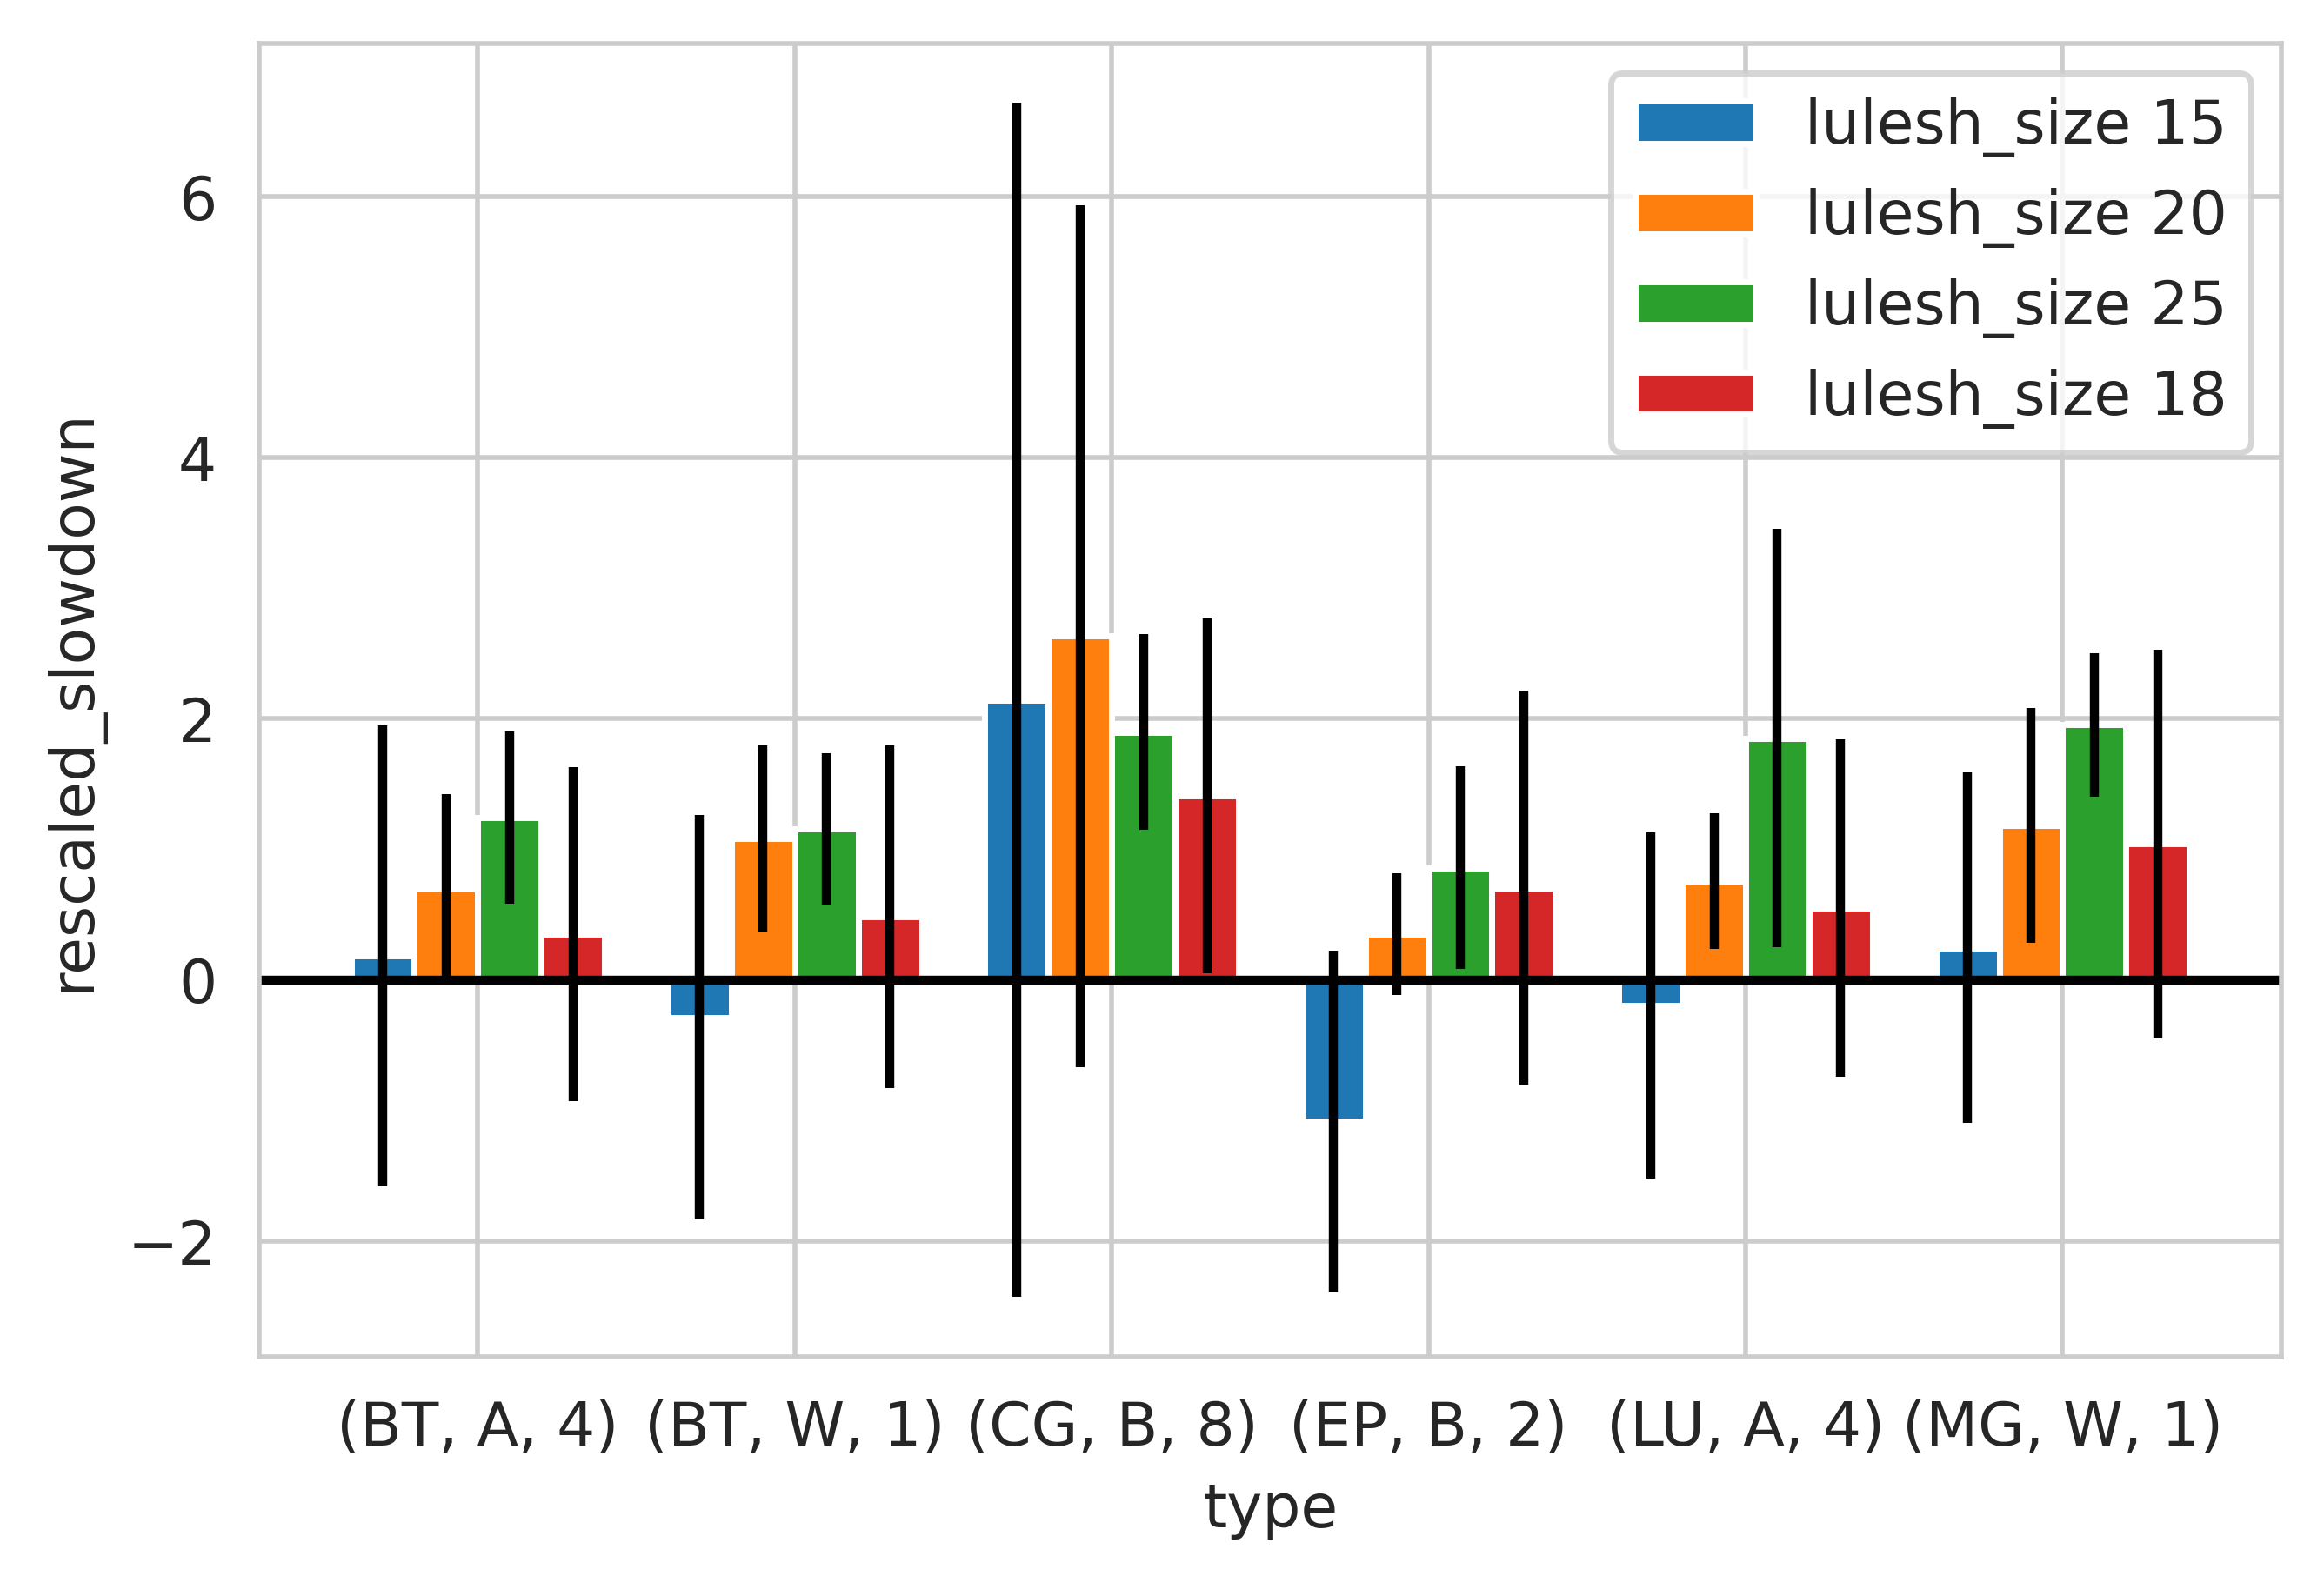

In [132]:


def grouped_barplot(df, cat,subcat, val , err):
    plt.clf()
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    plt.axhline(y=.0, color='black', linestyle='-')
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{} {}".format(subcat, gr), yerr=dfg[err].values)
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    #plt.ylim([0.95, 1.08])
    plt.legend()
    plt.show()
    
    
cat = "type"
subcat = "lulesh_size"
val = "rescaled_slowdown"
err = "rescaled_slowdown_dev"

# call the function with df from the question
grouped_barplot(df5_modified, cat, subcat, val, err )

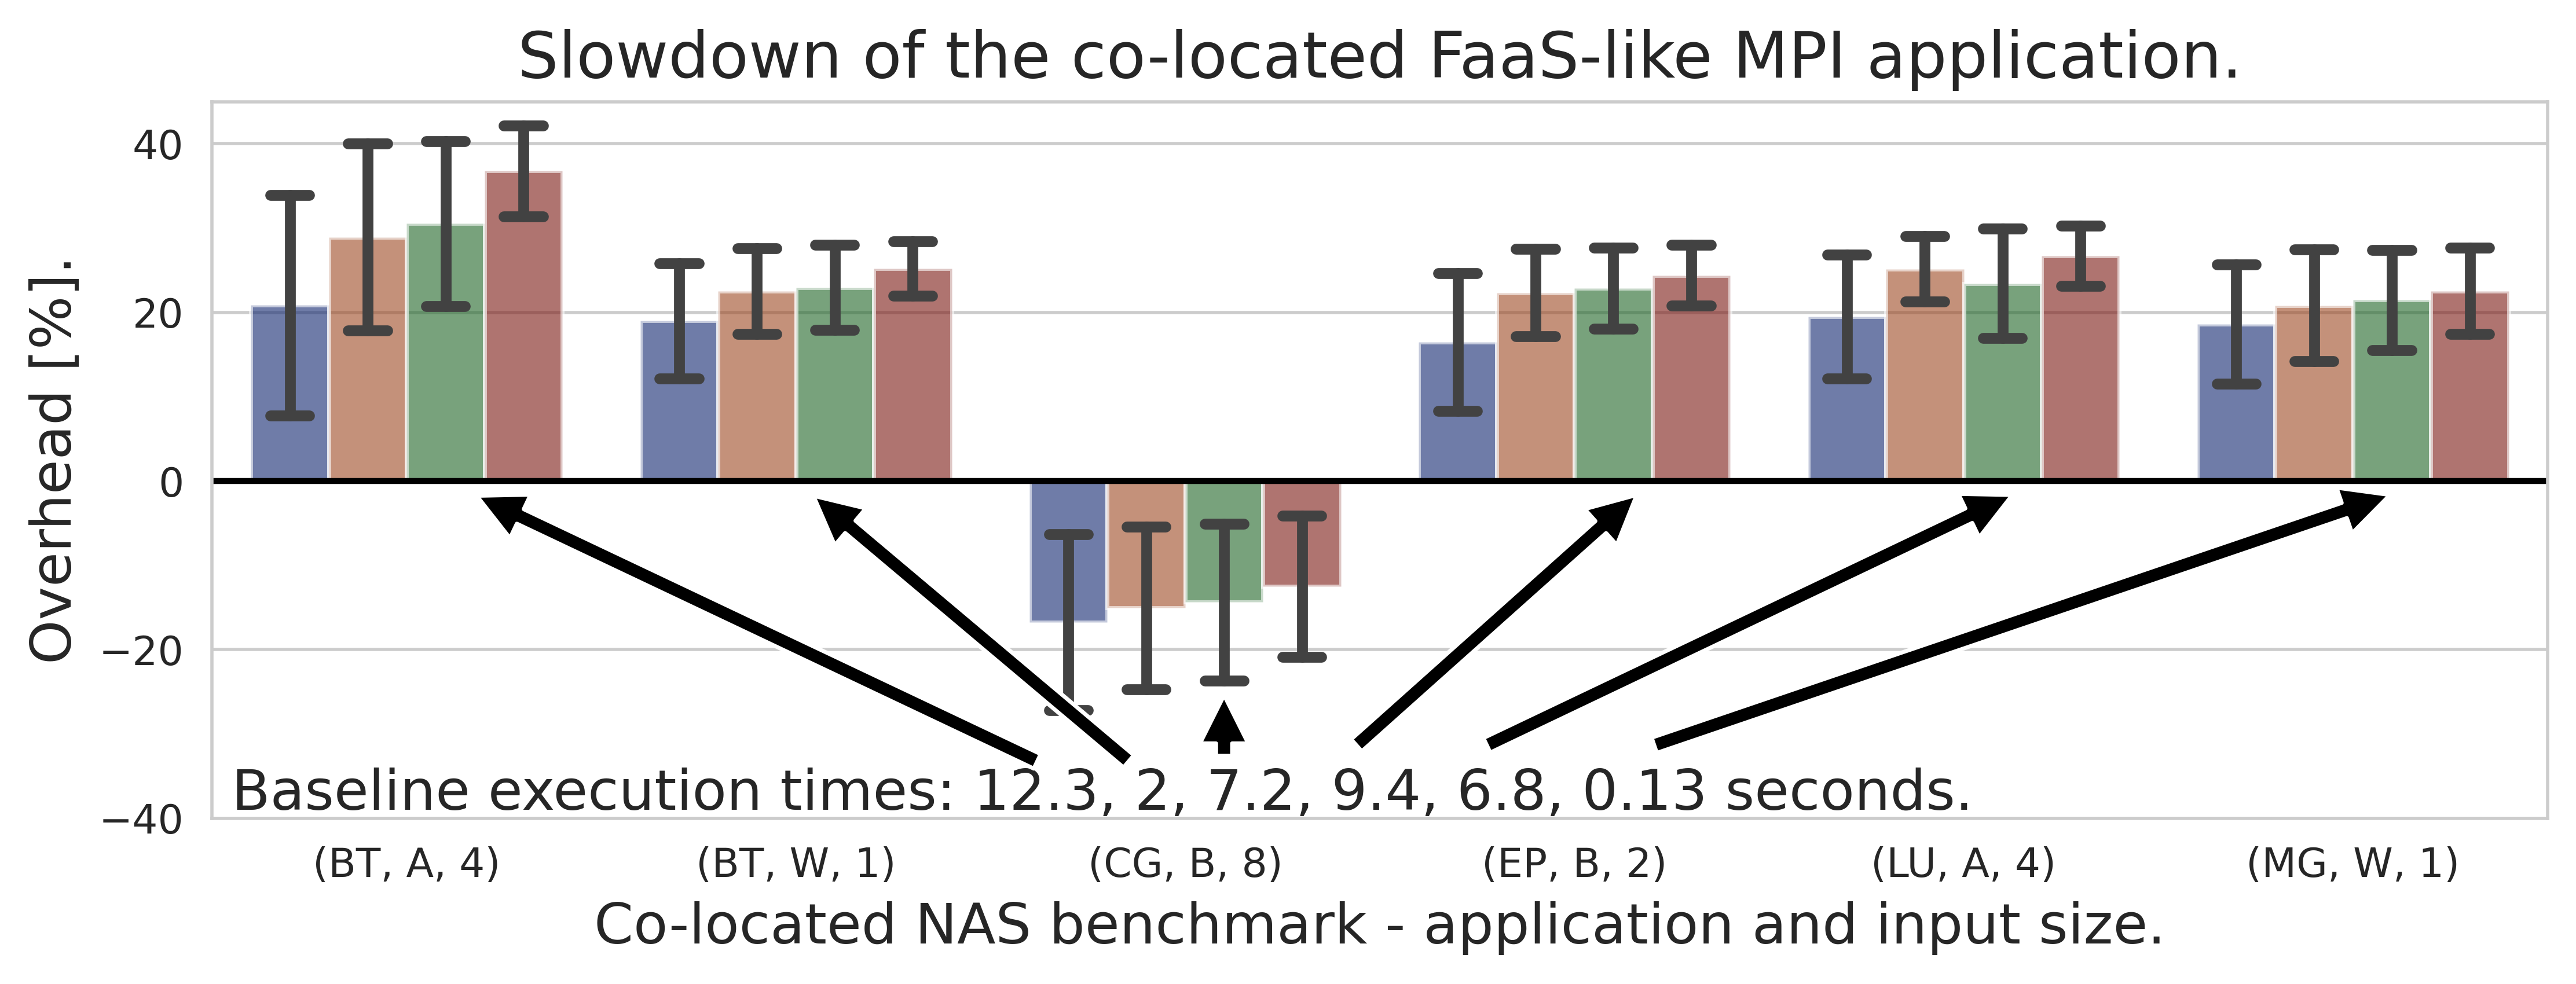

In [51]:

sns.set_style("whitegrid")
fig = plt.figure(figsize=(9,3.5))
ax = fig.gca()
#g = sns.barplot(
#    data=df5_modified,
#    x="type", y="nas_slowdown", hue="lulesh_size",
#    ci="sd", palette="dark", alpha=.6, #, alpha=.6, height=6,
#    ax=ax
#)
g = barplot_err(y="rescaled_nas_slowdown", x="type", yerr="rescaled_nas_slowdown_dev",
                hue="lulesh_size", data=df5_modified,palette="dark", alpha=.6, capsize=0.1)

g.set_ylabel('Overhead [%].',fontsize=14)
g.set_title('Slowdown of the co-located FaaS-like MPI application.',fontsize=16)
g.legend().set_visible(False)
g.axhline(y=0, color='black', linestyle='-')
g.set_ylim([-40, 45])
g.set_xlabel('Co-located NAS benchmark - application and input size.',fontsize=14)


plt.annotate("Baseline execution times: 12.3, 2, 7.2, 9.4, 6.8, 0.13 seconds.",
             #r'Free memory in $\bf{allocated}$'+'\n'+r'and $\bf{idle}$ nodes.',
             xy=(0.5, -2),  #xycoords='data',
            xytext=(-0.45, -39), fontsize=14,
    #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)
plt.annotate("", xy=(0.1, 0),  #xycoords='data',
            xytext=(1.7, -35),
            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)
plt.annotate("", xy=(1, 0),  #xycoords='data',
            xytext=(1.9, -35),
            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)
plt.annotate("", xy=(2.1, -25),  #xycoords='data',
            xytext=(2.1, -33),
            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)
plt.annotate("", xy=(3.2, 0),  #xycoords='data',
            xytext=(2.4, -33),
            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)
plt.annotate("", xy=(4.2, 0),  #xycoords='data',
            xytext=(2.7, -33),
            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)
plt.annotate("", xy=(5.2, 0),  #xycoords='data',
            xytext=(3.1, -33),
            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)


plt.rcParams['figure.dpi'] = 500
plt.tight_layout()
plt.savefig("colocation_cpu_nas.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)